In [47]:
import math
import numpy as np
import torch
import torch.nn as nn
from PIL import Image
from functools import partial
from torchvision.transforms import RandomResizedCrop, RandomHorizontalFlip, Compose, ToTensor, ToPILImage
import matplotlib.pyplot as plt

In [48]:
img_size = 224
patch_size = 32

In [49]:
def load_ds(imgs, patch_size, transforms):
    img = transforms(imgs)
    imgp = img.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size).permute((0, 3, 4, 1, 2)).flatten(3).permute((3, 0, 1, 2))
    return imgp

def transforms(img_size:int):
    return Compose([RandomResizedCrop(size=img_size, scale=[0.4, 1], ratio=[0.75, 1.33], interpolation=2), 
                    RandomHorizontalFlip(p=0.5), 
                    ToTensor()])

In [50]:
import datasets
import pandas as pd
data_imgs = datasets.load_dataset("spacevision-upb/MOD_LSTD_E_downscaled")
idx_df = pd.read_csv('../local_ds.csv')['hf_idx']
imgs = data_imgs['train']['image']
imgs = [imgs[i] for i in idx_df]
imgs = [load_ds(img,patch_size = 32, transforms=transforms(224)) for img in imgs]

Resolving data files:   0%|          | 0/1123 [00:00<?, ?it/s]

In [51]:
img_all = imgs[0:3]

In [61]:
from Hydra_MAE import HydraMAE
model = HydraMAE()
model.load_state_dict(torch.load("../model_nuevo.pth"))

<All keys matched successfully>

In [62]:
output, masks = model(img_all)

In [75]:
final_img = output[2]

In [76]:
flatten_img = img_all[0]

In [77]:
reconstruct_img = final_img.reshape(49,3,32,32)
reconstruct_img.shape

torch.Size([49, 3, 32, 32])

In [78]:
test_res = flatten_img.reshape(49,3,32,32)

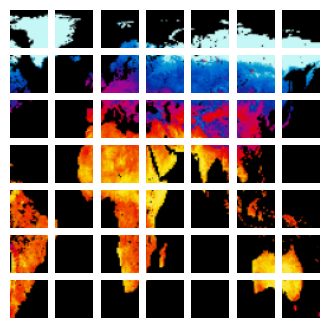

In [79]:
fig, ax = plt.subplots(figsize=(4, 4), nrows=7, ncols=7)
for n, i in enumerate(test_res):
    ax.flat[n].imshow(ToPILImage()(i))
    ax.flat[n].axis("off")
plt.show()

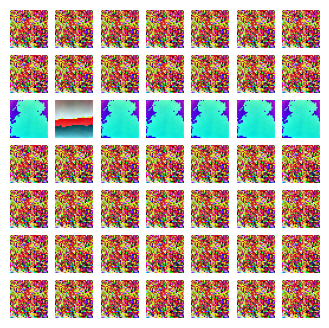

In [80]:
fig, ax = plt.subplots(figsize=(4, 4), nrows=7, ncols=7)
for n, i in enumerate(reconstruct_img):
    ax.flat[n].imshow(ToPILImage()(i))
    ax.flat[n].axis("off")
plt.show()
# Save the figure
fig.savefig("reconstruct_img.png")